In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import datetime 

df = pd.read_csv('Bitfinex_BTCEUR_trades_2018_02_02.csv')

df['date'] =  df['date']/1000


df['new date'] = df['date'].map(lambda val: datetime.datetime.fromtimestamp(val).
                                strftime('%H:%M:%S'))
del df['date']

df1= df.set_index("id", drop = True)
df1.iloc[:,-1]



#index = pd.date_range(df['new date'], periods=9, freq='T')
#series = pd.Series(range(15715), index=index)


#series = pd.Series(range(15715), index=df1.iloc[:,-1])
#series.resample('3T')

#x_axes = df.iloc[:,-1].resample
#x_axes = df.resample('3T', on='new date')

df.head()

,id,exchange,symbol,price,amount,sell,new date
0,183601815,bf,btceur,7349.60000,0.004568,False,02:00:08
1,183601825,bf,btceur,7354.68045,0.010000,True,02:00:09
2,183601823,bf,btceur,7354.68045,0.004568,True,02:00:09
3,183601833,bf,btceur,7354.60000,0.102395,False,02:00:10
4,183601904,bf,btceur,7343.40750,0.086580,False,02:00:26


In [85]:
new_df = df.loc[[i for j, i in enumerate(df.index) if j % 50 == 0]]


In [86]:
np.array(df['price'])
def ExponentialWeightedMean (values, window):
    weights = np.exp(np.linspace(-1,0,window))
    weights /= weights.sum()
    
    a = np.convolve(values,weights) [:len(values)]
    a [:window] = a[window]
    return a

ExponentialWeightedMean(df.iloc[::10,3], 7)

array([7297.48998042, 7297.48998042, 7297.48998042, ..., 7097.31746805,
       7097.62420924, 7104.65163258])

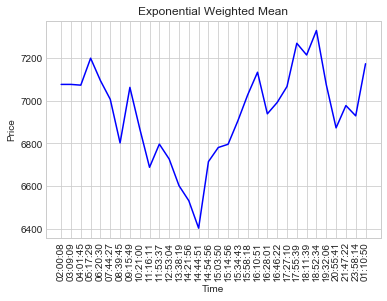

In [87]:
import numpy as np
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()


x = new_df.iloc[::10, -1]
y = ExponentialWeightedMean(new_df.iloc[::10,3],1)

graph = plt.plot(x,y, color = 'blue')
plt.title('Exponential Weighted Mean')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=90);
